# Gradient Descent Using Linear Regression

### by Richard Guinto <rfguinto@upd.edu.ph>

In [16]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [17]:
#### Edit the ppar list to contain the polynomial coefficient
#### Assumption:  from 2 to 4 coefficents only (up to 3rd degree polynomial)
#### first value is the coefficient of the highest degree
#### for example:  [2, 4, -1] means y = 2x^2 + 4x - 1

In [18]:
#generate random parameters
print("Generating random parameters...")
ppar = np.random.randint(-30,30,3)
print("Polynomial parameters: ", ppar)

p = np.poly1d(ppar)

# h(x) = theta0 + theta1 x1 + theta2 x2 + theta3 x3
# where x1 = x, x2 = x^2, and x3 = x^3
r = range(-100,101)
x = np.ndarray(len(ppar))
X = np.ndarray([len(r), len(ppar)])
Y = np.ndarray([len(r)])
xi = 0
#this section of the code will generate the normalize dataset
# of the polynomial equation
# given the value of x in a specific range of integer values
for v in r:
    x[0] = 1
    for i in range(1,len(ppar)) :
        x[i] = v**i / np.abs(r[0]**i)
        y = p(v)
    X[xi,:] = x
    Y[xi] = y
    xi = xi + 1

Generating random parameters...
Polynomial parameters:  [-26  29  17]


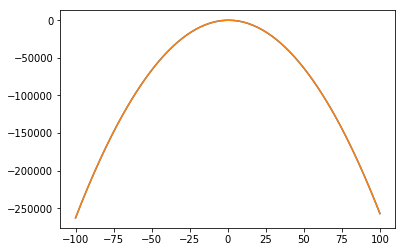

In [19]:
plt.plot(r,Y)
#Add some uniform distribution noise in the output
Y = Y + np.random.uniform(-1,1,Y.shape)
plt.plot(r,Y)
#normalize output
Y = Y / np.abs(r[0]**len(ppar))
plt.show()

In [20]:
#### The succeeding sections are not really part of the solution
#### but the author just illustrates some graphs to better understand
#### the cost function behaviour with respect to changing the weights

In [21]:
wr = [range(0),range(0),range(0),range(0)]
for i in range(0,4):
    if len(ppar)-1 >= i:
        wr[i] = range(-10,11)
    else:
        wr[i] = range(0,1)
#print(wr)
J = np.ndarray([len(wr[3]),len(wr[2]),len(wr[1]),len(wr[0])])
for w3 in wr[3]:
    for w2 in wr[2]:
        for w1 in wr[1]:
            for w0 in wr[0]:
                w = [w0,w1]
                if (len(ppar) >= 3):
                    w = w + [w2]
                if (len(ppar) >= 4):
                    w = w + [w3]
                predict = np.matmul(X,w)
                loss = predict - Y
                J[w3-wr[3][0],w2-wr[2][0],w1-wr[1][0],w0-wr[1][0]] = np.sum(loss**2)/(2 * len(loss))

In [22]:
# Make data.
A = range(-10,11)
B = range(-10,11)
A, B = np.meshgrid(A, B)

gr = range(-10,11,4)

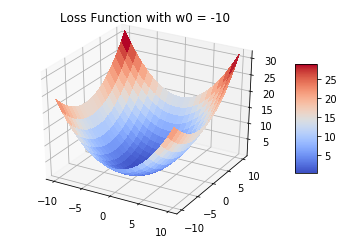

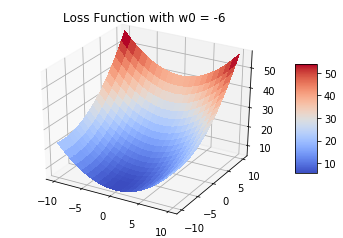

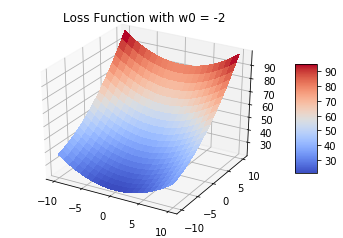

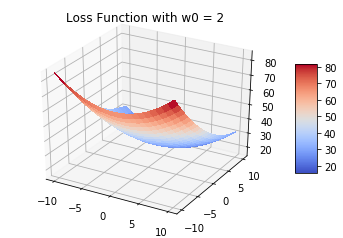

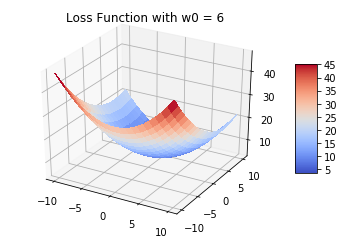

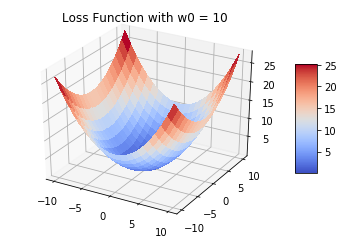

In [23]:
for i in gr:
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(A, B, J[wr[3][0],:,:,i], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title("Loss Function with w0 = %d" % i)


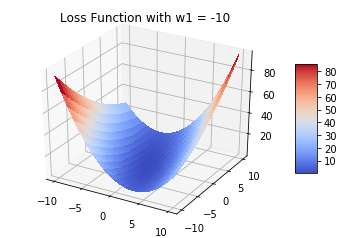

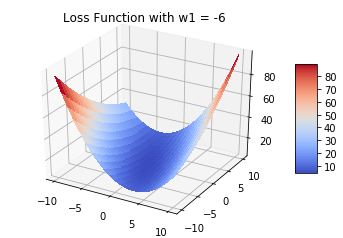

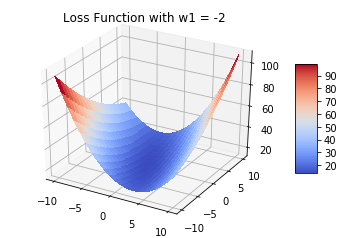

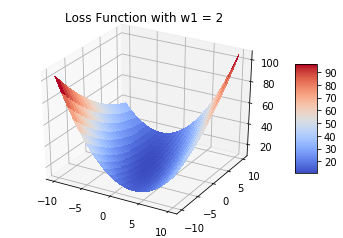

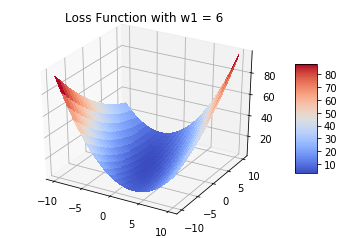

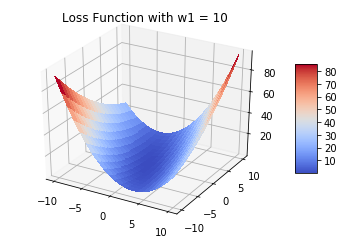

In [24]:
for i in gr:
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(A, B, J[wr[3][0],:,i,:], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title("Loss Function with w1 = %d" % i)


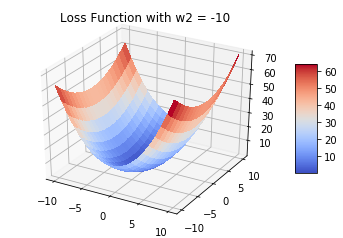

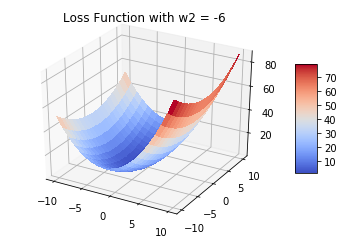

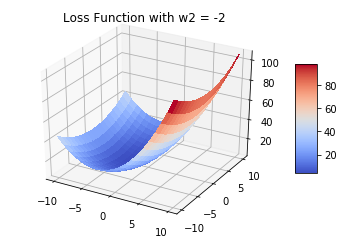

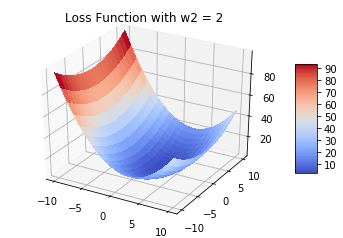

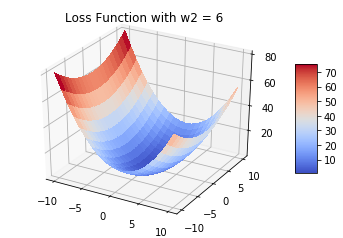

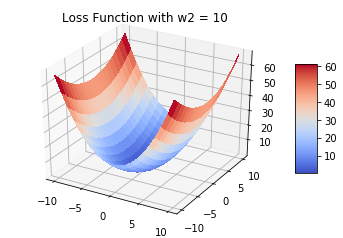

In [25]:
if len(ppar) >= 3:
    for i in gr:

        fig = plt.figure()
        ax = fig.gca(projection='3d')

        surf = ax.plot_surface(A, B, J[wr[3][0],i,:,:], cmap=cm.coolwarm, linewidth=0, antialiased=False)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.title("Loss Function with w2 = %d" % i)

In [26]:
theta = np.random.randint(-10,10,size=len(ppar))
loss_rate = np.ndarray(len(theta))
temp = np.ndarray(len(theta))
predict = np.matmul(X,theta)
loss = predict - Y
max_iter = 10000
loss_total = np.ndarray(max_iter)
loss_total[0] = np.sum(loss**2)/(2* len(loss))
#alpha = (np.cos(0)/2+0.5)/1000
alpha = 0.3 / (10**(4 - len(ppar)))
for iter in range(1,max_iter):
    for i in range(0,len(theta)):
        loss_rate[i] = np.sum(loss * X[:,i])/len(loss)
        temp[i] = theta[i] - (alpha * (loss_rate[i]))

    theta = temp
    predict = np.matmul(X,theta)
    loss = predict - Y
    loss_total[iter] = np.sum(loss**2)/(2* len(loss))
    loss_diff = loss_total[iter] - loss_total[iter-1]
    #alpha = (np.cos(iter * np.pi / 50)/2+0.5)/1000
    #np.set_printoptions(precision=2,suppress=False)
    #print(theta, loss_total[iter])

In [27]:
print(theta, loss_total[max_iter-1])

[  1.70122222e-05   2.89998318e-03  -2.60000071e-01] 1.75327326194e-13


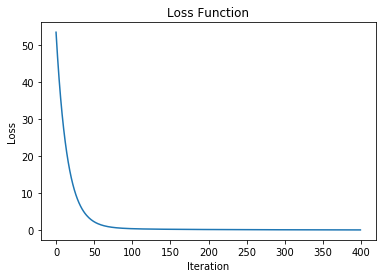

In [28]:
#graph the loss value for the first hundreds of iterations
limit = int(1200/len(ppar))
iter = range(0,limit)
plt.plot(iter,loss_total[:limit])
plt.title("Loss Function")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


In [29]:
#mult = [10**8, 10**6, 10**4, 10**2]
mult = [10**2,10**4]
if len(ppar) >= 3:
    mult = mult + [10**6]
if len(ppar) >= 4:
    mult = mult + [10**8]
mult.reverse()
theta = theta * mult
print("theta: ", theta)

theta:  [ 17.01222222  28.99983178 -26.0000071 ]


In [30]:
coef = theta[::-1]
coef = np.round(coef,0)
print("Polynomial Coefficients: ", coef)

Polynomial Coefficients:  [-26.  29.  17.]
